<a href="https://colab.research.google.com/github/dmuman/ML-projects-and-tutorials/blob/main/NumPy/Projects/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Опис проєкту

Буде завантажено реальний набір даних, виконано попередню обробку, очистку даних, заповнено відсутні значення, виконано нормалізацію та, за потреби, створено нові ознаки.

Для виконання буде використано NumPy та Pandas.

# Імпорт бібліотек

In [46]:
import numpy as np
import pandas as pd

* **NumPy** для роботи з матрицями та обробкою даних
* **Pandas** для завантаження набору даних

# Завантаження набору даних

Для прикладу буде використано популярний набір даних `"Diabetes"` з UCI Machine Learning Repository. Цей набір містить інформацію про медичні виміри для діагностики діабету:

In [47]:
from google.colab import files

uploaded = files.upload()

Saving diabetes_data_all_patient.csv to diabetes_data_all_patient (2).csv


In [48]:
# створення датафрейму
df = pd.read_csv('diabetes_data_all_patient.csv', sep=',')

# попередній перегляд даних (перші 10 рядків)
df.head(10)

,Unnamed: 0,patient_id,date,time,code,value
0,0,1,04-21-1991,9:09,58,100
1,1,1,04-21-1991,9:09,33,9
2,2,1,04-21-1991,9:09,34,13
3,3,1,04-21-1991,17:08,62,119
4,4,1,04-21-1991,17:08,33,7
5,5,1,04-21-1991,22:51,48,123
6,6,1,04-22-1991,7:35,58,216
7,7,1,04-22-1991,7:35,33,10
8,8,1,04-22-1991,7:35,34,13
9,9,1,04-22-1991,13:40,33,2


# Отримання загальної інформації про датафрейм.

Буде використано функцію `info()` для загального опису фрейму (кількість рядків, не-нулових (не `NaN`) значень, кількісних та текстових даних).

Функцію `describe()` для статистичного аналізу як кількісних, так і текстових даних:

In [49]:
# загальний опис фрейму
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29330 entries, 0 to 29329
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  29330 non-null  int64 
 1   patient_id  29330 non-null  int64 
 2   date        29297 non-null  object
 3   time        29330 non-null  object
 4   code        29330 non-null  int64 
 5   value       29297 non-null  object
dtypes: int64(3), object(3)
memory usage: 1.3+ MB


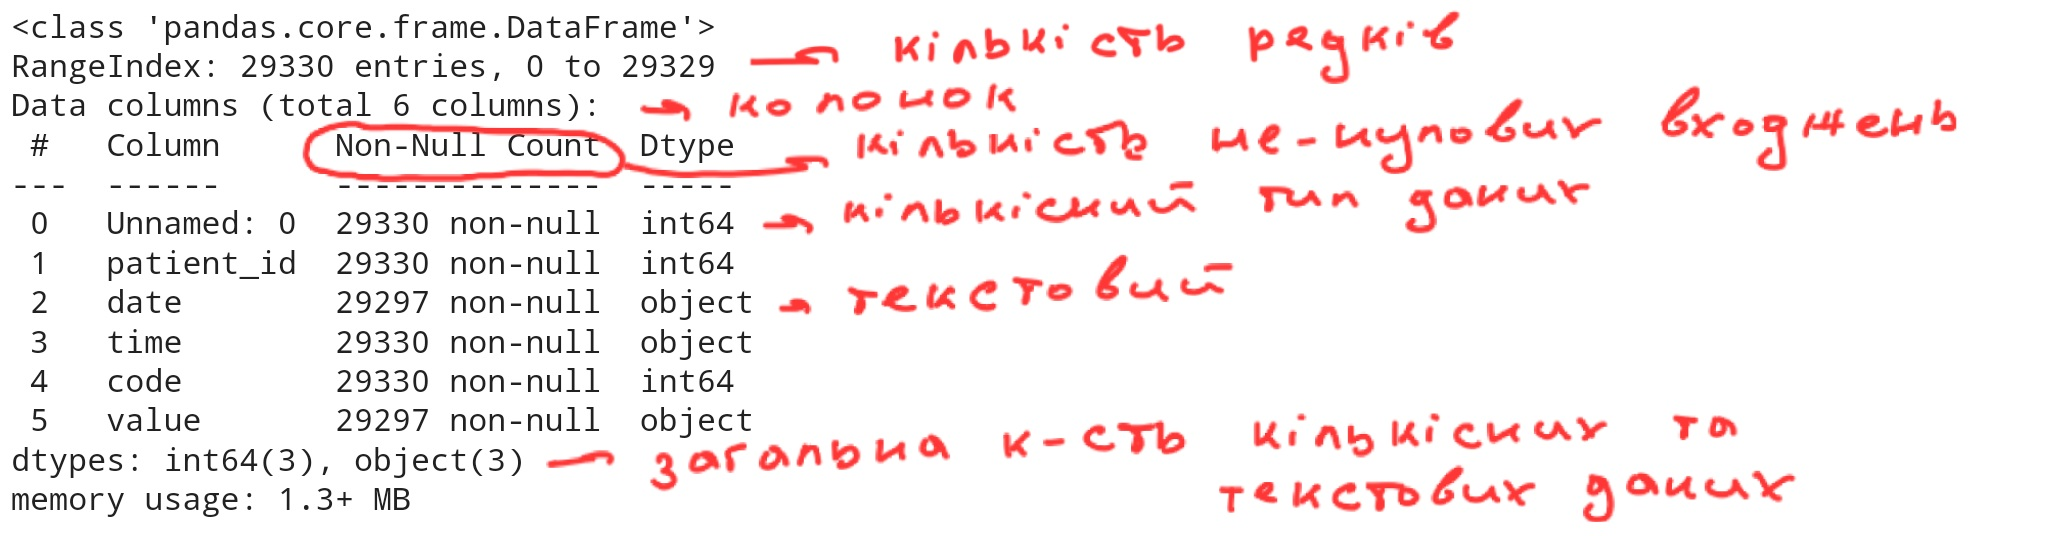

In [50]:
# статистика кількісних даних
df.describe()

,Unnamed: 0,patient_id,code
count,29330.000000,29330.000000,29330.000000
mean,318.006035,36.435152,46.428606
std,287.185714,20.101179,13.453219
min,0.000000,1.000000,0.000000
25%,105.000000,21.000000,33.000000
50%,221.000000,34.000000,48.000000
75%,462.750000,55.000000,60.000000
max,1326.000000,70.000000,72.000000


* `count`: число не-нулових (not NaN) значень. В даному випадку - це 29330 на кожен стовпчик.
* `mean`: середнє значення не-нулових значень.
* `std`: [середньоквадратичне відхилення](https://www.google.com/url?q=https%3A%2F%2Fen.wikipedia.org%2Fwiki%2FStandard_deviation) не-нулових значень
* `min`: мінімум усіх не-нулових значень
* `25%`, `50%`, `75%`: 25а, 50а та 75а третина ([percentile](https://www.google.com/url?q=https%3A%2F%2Fen.wikipedia.org%2Fwiki%2FPercentile)) всіх не-нулових значень
* `max`: максимум усіх не-нулових значень

Оскільки колонка 'Unnamed: 0' не несе в собі ніякої корисної інформації - її можна просто видалити. Зробити це можна за допомогою функції `pop()`.

Цю функцію можна виконати над датафреймом, оскільки він є, по суті, словником з об'єктів `Series`:

In [53]:
df.drop(columns=['Unnamed: 0'], inplace=True) # inplace=True, щоб змінити оригінальний фрейм
df.head() # перевіримо, чи колонку було видалено

,patient_id,date,time,code,value
0,1,04-21-1991,9:09,58,100
1,1,04-21-1991,9:09,33,9
2,1,04-21-1991,9:09,34,13
3,1,04-21-1991,17:08,62,119
4,1,04-21-1991,17:08,33,7


Так, колонку було успішно видалено!

In [54]:
# статистика текстових даних
df.describe(include=[object])

,date,time,value
count,29297,29330,29297
unique,1141,1311,696
top,09-19-1990,08:00,6
freq,126,3101,1509


* `count`: кількість непорожніх значень в колонці
* `unique`: кількість унікальних значень
* `top`: найбільш популярне значення
* `freq`: частота, з якою зустрічається найбільш популярне значення

# Попередня обробка та очищення даних

**Видалення або заповнення відсутніх значень.**

Перевіримо, чи є в колонках відсутні значення за допомогою функції `isnull()`:

In [55]:
# перевірка на наявнясть відсутніх значень
df.isnull().sum()

,0
patient_id,0
date,33
time,0
code,0
value,33


Можна помітити, що відсутні значення є в колонках `date` та `value`. Тобто лише в колонках з текстовими даними.

У такому випадку можна просто видалити всі рядки, які мають відсутні значення (`NaN`) функцією `dropna()`:

In [56]:
df.dropna(inplace=True) # inplace=True вказує на те, що буде змінено оригінальний фрейм

Перевіримо кількість пропущених значень тепер:

In [57]:
df.isnull().sum()

,0
patient_id,0
date,0
time,0
code,0
value,0


От тепер все по нулях.

Тепер об'єднаємо колонки з датою та годинами для зручнішого аналізу:

In [62]:
df[3634:3637]

,patient_id,date,time,code,value
3634,11,07-16-1990,07:03,33,11
3635,11,07-16-1990,07:03,34,36
3636,11,07-16-1990,13:33,61,208


In [66]:
df['datetime'] = df['date'] + ' ' + df['time']

df.head()

,patient_id,date,time,code,value,datetime
0,1,04-21-1991,9:09,58,100,04-21-1991 9:09
1,1,04-21-1991,9:09,33,9,04-21-1991 9:09
2,1,04-21-1991,9:09,34,13,04-21-1991 9:09
3,1,04-21-1991,17:08,62,119,04-21-1991 17:08
4,1,04-21-1991,17:08,33,7,04-21-1991 17:08


In [67]:
df.drop(columns=['date', 'time'], inplace=True)
df.head()

,patient_id,code,value,datetime
0,1,58,100,04-21-1991 9:09
1,1,33,9,04-21-1991 9:09
2,1,34,13,04-21-1991 9:09
3,1,62,119,04-21-1991 17:08
4,1,33,7,04-21-1991 17:08


In [74]:
# Групуємо дані за кодом і описуємо основні статистичні показники
summary_by_code = df.groupby('code')['value'].describe()
summary_by_code

,count,unique,top,freq
code,,,,
4,1,1,0,1
33,9485,52,6,1230
34,3830,68,18,272
35,1053,25,30,97
36,1,1,5,1
48,1883,418,101,27
56,119,71,130,5
57,990,335,60,11
58,3518,429,147,31


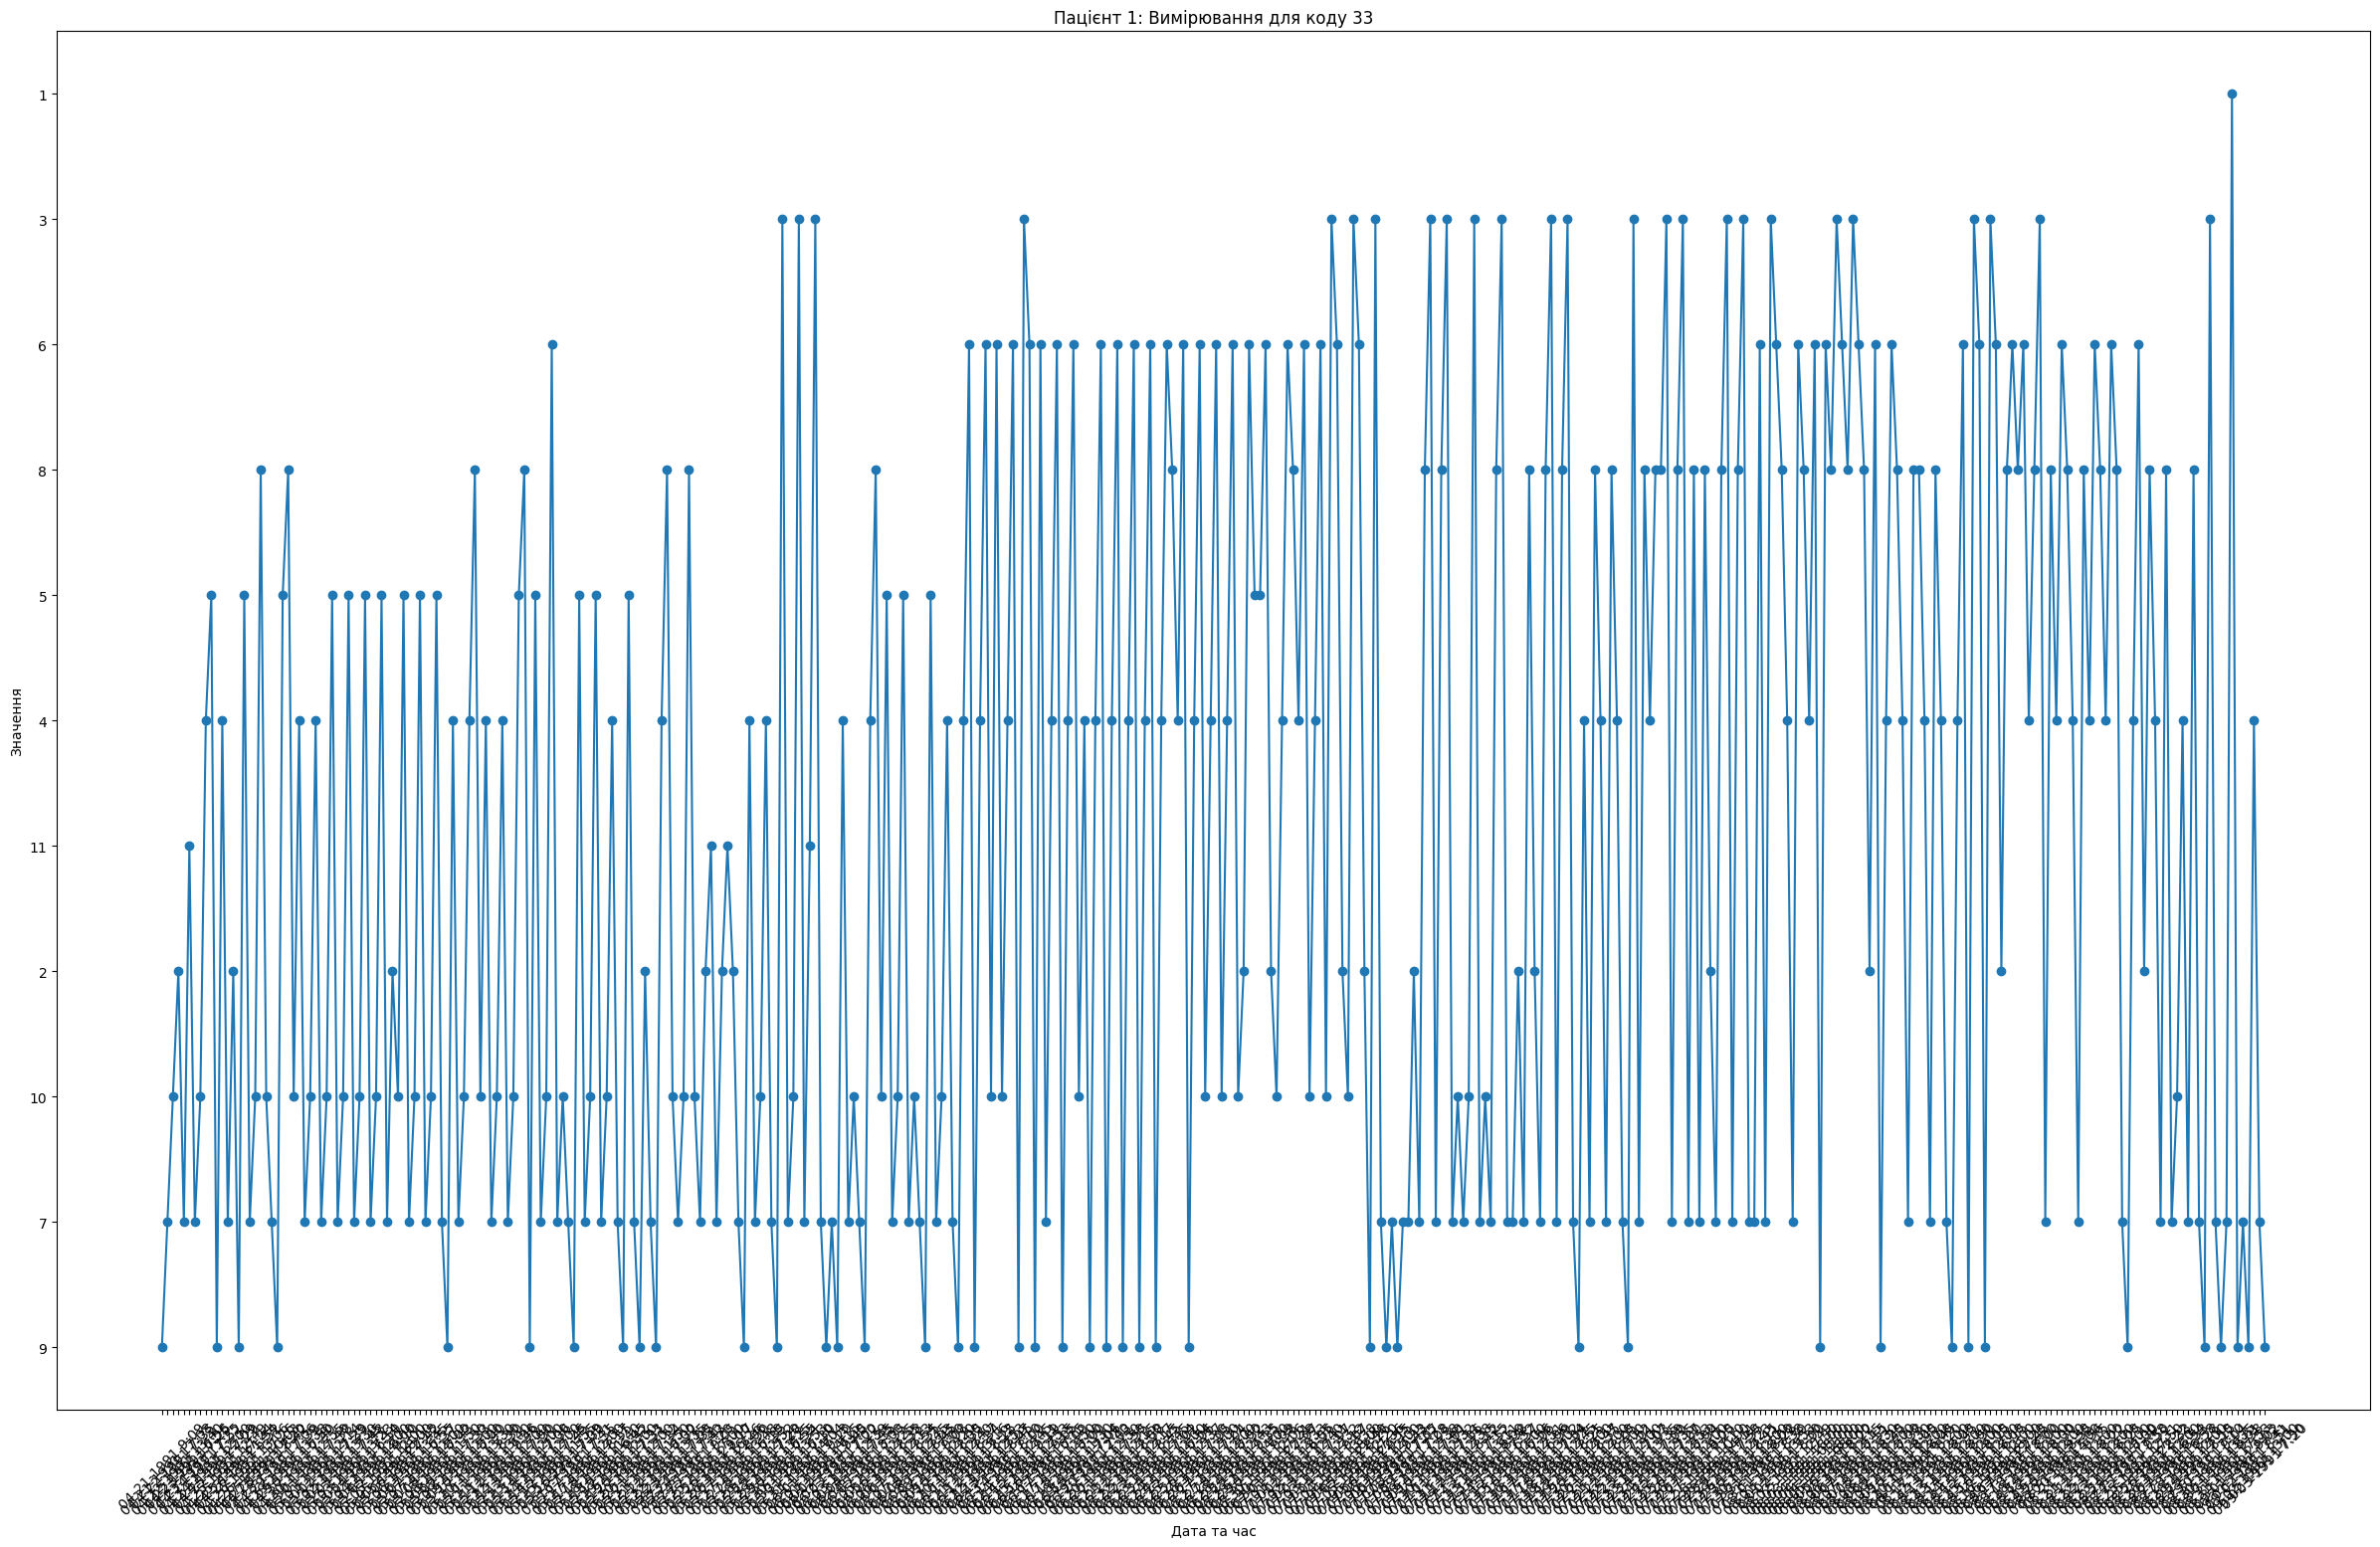

In [81]:
import matplotlib.pyplot as plt

patient_id = 1
code_to_visualize = 33

patient_data = df[(df['patient_id'] == patient_id) & (df['code'] == code_to_visualize)]

plt.figure(figsize=(30, 18))
plt.plot(patient_data['datetime'], patient_data['value'], marker='o')
plt.title(f'Пацієнт {patient_id}: Вимірювання для коду {code_to_visualize}')
plt.xlabel('Дата та час')
plt.ylabel('Значення')
plt.xticks(rotation=45)
# plt.tight_layout()
plt.show()